In [18]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
 

#path = 'D:\23B81A66J4\Machine-Learning/Position_Salaries.csv'
# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
 
# Independent variable (Position Level)
X = dataset.iloc[:, 1:-1].values
 
# Dependent variable (Salary)
y = dataset.iloc[:, -1].values
 
# Display dataset preview
print("Dataset Preview:")
print(dataset.head())

Dataset Preview:
            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000


In [19]:
# Training the Linear Regression model on the whole dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
 
# Training the Polynomial Regression model on the whole dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)
 
print("✅ Models Trained Successfully!")

✅ Models Trained Successfully!


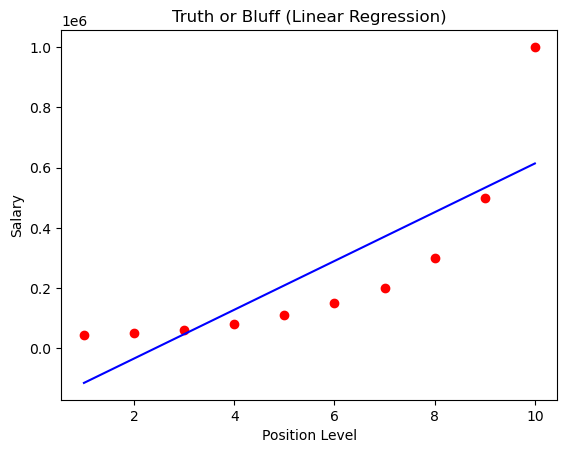

In [20]:
# Visualising the Linear Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

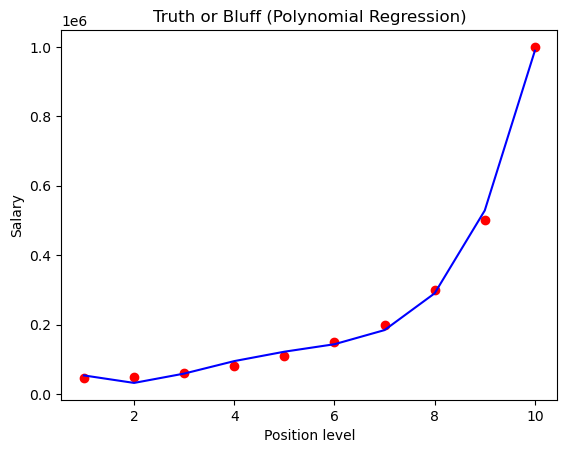

In [21]:
# Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

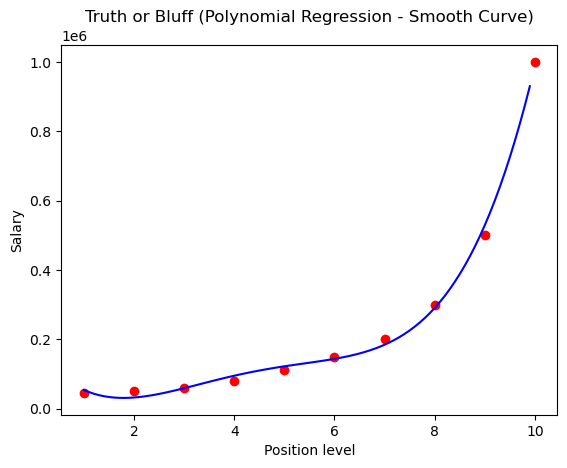

In [22]:
# Visualising the Polynomial Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression - Smooth Curve)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [23]:
# Predicting a new result with Linear Regression
linear_prediction = lin_reg.predict([[6.5]])
print("Linear Regression Prediction for Level 6.5:", linear_prediction)

Linear Regression Prediction for Level 6.5: [330378.78787879]


In [24]:
# Predicting a new result with Polynomial Regression
poly_prediction = lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))
print("Polynomial Regression Prediction for Level 6.5:", poly_prediction)

Polynomial Regression Prediction for Level 6.5: [158862.45265153]


   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

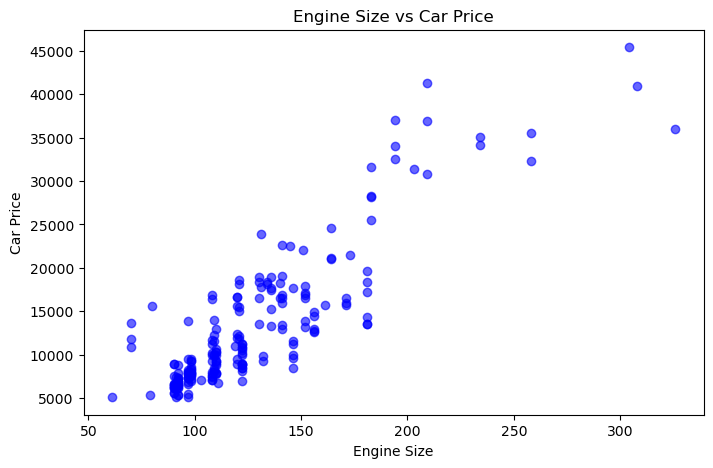

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

df = pd.read_csv('CarPrice_Assignment.csv')

# Display first few rows
print(df.head())

X = df[['enginesize']]
y = df['price']


plt.figure(figsize=(8,5))
plt.scatter(X, y, color='blue', alpha=0.6)
plt.xlabel('Engine Size')
plt.ylabel('Car Price')
plt.title('Engine Size vs Car Price')
plt.show()



In [26]:
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

y_pred = model.predict(X_poly)

r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print("R² Score:", r2)
print("RMSE:", rmse)


R² Score: 0.7938681287369995
RMSE: 3618.221247975694


c:\Users\CVR\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


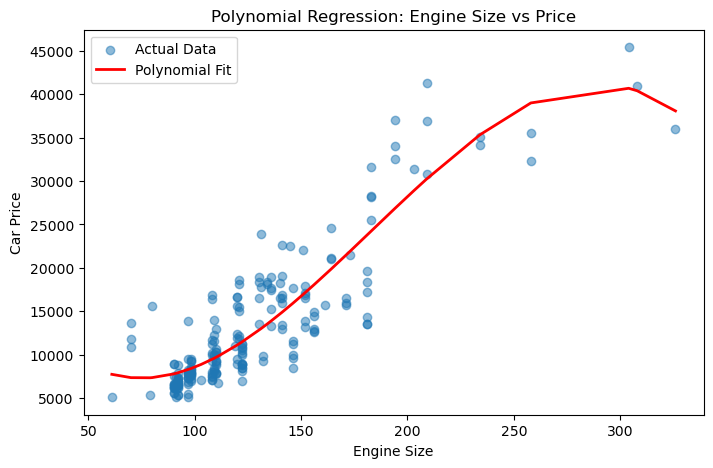

In [29]:
X_sorted = np.sort(X.values, axis=0)
X_sorted_poly = poly.transform(X_sorted)
y_pred_sorted = model.predict(X_sorted_poly)

plt.figure(figsize=(8,5))
plt.scatter(X, y, alpha=0.5, label='Actual Data')
plt.plot(X_sorted, y_pred_sorted, color='red', linewidth=2, label='Polynomial Fit')
plt.xlabel('Engine Size')
plt.ylabel('Car Price')
plt.title('Polynomial Regression: Engine Size vs Price')
plt.legend()
plt.show()


In [28]:
engine_size_input = np.array([[200]])
engine_size_poly = poly.transform(engine_size_input)

predicted_price = model.predict(engine_size_poly)
print("Predicted price for engine size 200:", predicted_price[0])


Predicted price for engine size 200: 28207.45163684308


c:\Users\CVR\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


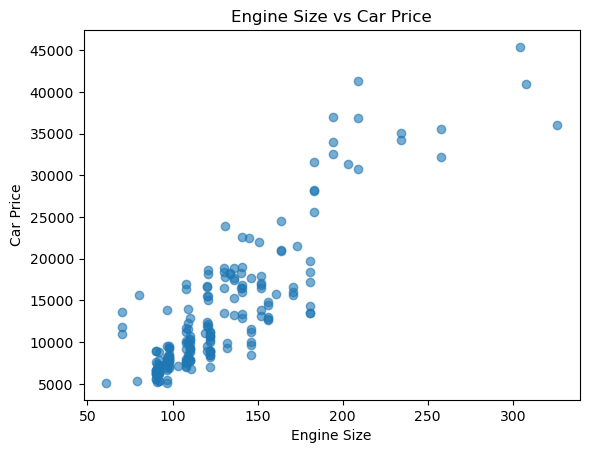

Linear Model -> RMSE: 3932.6147746643665 R²: 0.8040958796678975
Polynomial Model -> RMSE: 3409.0159071357666 R²: 0.8527894915205757


c:\Users\CVR\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\CVR\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


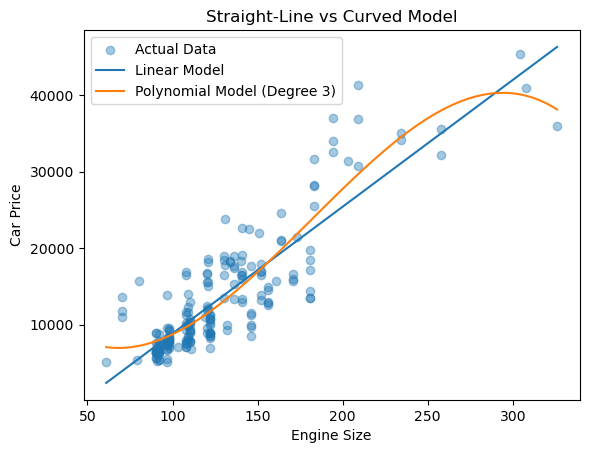

Predicted price (Linear model): 25427.147445039867
Predicted price (Polynomial model): 27760.60834545276


c:\Users\CVR\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\CVR\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# ---------------------------------------------------
# 1. Load Dataset
# ---------------------------------------------------
df = pd.read_csv("CarPrice_Assignment.csv")

X = df[['enginesize']]   # Input feature
y = df['price']          # Output variable

# ---------------------------------------------------
# 2. Visualize Relationship
# ---------------------------------------------------
plt.scatter(X, y, alpha=0.6)
plt.xlabel("Engine Size")
plt.ylabel("Car Price")
plt.title("Engine Size vs Car Price")
plt.show()

# ---------------------------------------------------
# 3. Train-Test Split
# ---------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---------------------------------------------------
# 4. Straight-Line Model (Linear Regression)
# ---------------------------------------------------
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)

rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_linear = r2_score(y_test, y_pred_linear)

# ---------------------------------------------------
# 5. Curved Model (Polynomial Regression - Degree 3)
# ---------------------------------------------------
poly = PolynomialFeatures(degree=3, include_bias=False)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

y_pred_poly = poly_model.predict(X_test_poly)

rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
r2_poly = r2_score(y_test, y_pred_poly)

# ---------------------------------------------------
# 6. Compare Model Performance
# ---------------------------------------------------
print("Linear Model -> RMSE:", rmse_linear, "R²:", r2_linear)
print("Polynomial Model -> RMSE:", rmse_poly, "R²:", r2_poly)

# ---------------------------------------------------
# 7. Visualization of Model Flexibility
# ---------------------------------------------------
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

plt.scatter(X, y, alpha=0.4, label="Actual Data")
plt.plot(X_range, linear_model.predict(X_range), label="Linear Model")
plt.plot(
    X_range,
    poly_model.predict(poly.transform(X_range)),
    label="Polynomial Model (Degree 3)"
)
plt.xlabel("Engine Size")
plt.ylabel("Car Price")
plt.legend()
plt.title("Straight-Line vs Curved Model")
plt.show()

# ---------------------------------------------------
# 8. Predict Price for Engine Size = 200
# ---------------------------------------------------
engine_size = np.array([[200]])

linear_price = linear_model.predict(engine_size)[0]
poly_price = poly_model.predict(poly.transform(engine_size))[0]

print("Predicted price (Linear model):", linear_price)
print("Predicted price (Polynomial model):", poly_price)


In [4]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

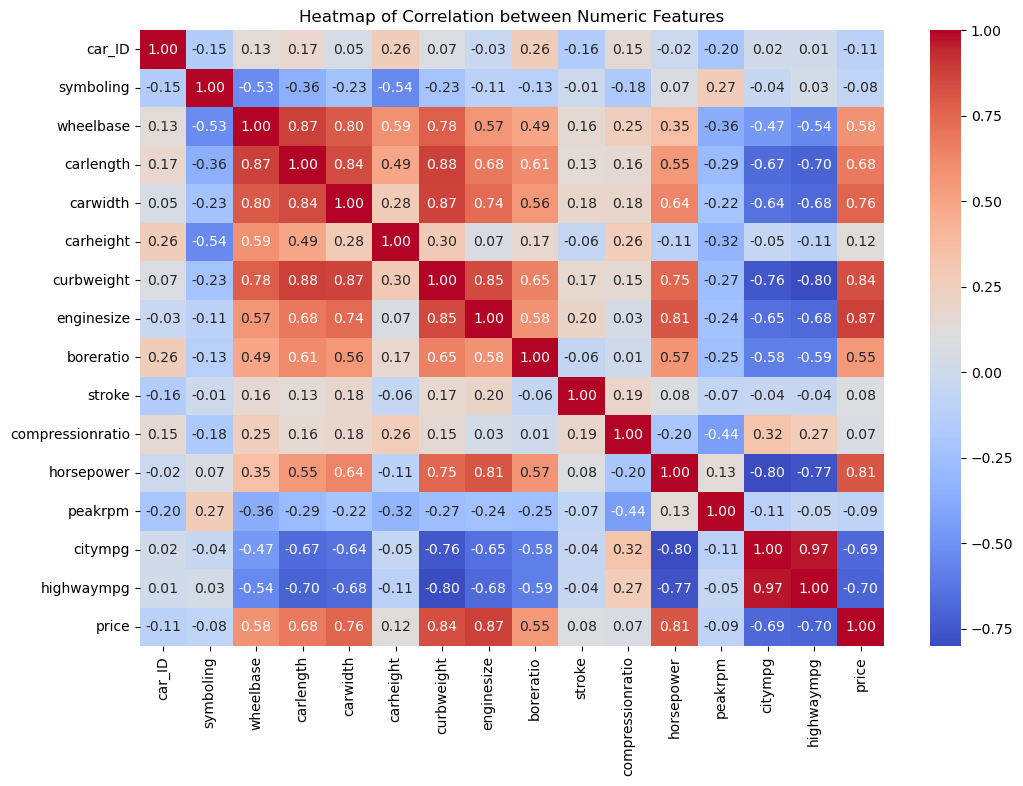

In [ ]:
import seaborn as sns

df = pd.read_csv("CarPrice_Assignment.csv")

# Select only numeric columns
numeric_df = df.select_dtypes(include=np.number)

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap of Correlation between Numeric Features")
plt.show()

### near to zero
symboling , stroke , compression ratio , peakrpm , car_id , citympg , highwaympg 

### Relationship of features with target Column(Car price)
 
### Condition

 
symboling = −0.08 - Weak negative
 
wheelbase r = +0.58 - Moderate positive
 
carlength r = +0.69 - Moderate positive
 
carwidth r = +0.76 - Strong positive
 
carheight r = +0.12 - Weak positive
 
curbweight r = +0.84 - Strong positive
 
enginesize r = +0.87 - Strong positive
 
boreratio r = +0.55 - Moderate positive
 
stroke r = +0.08 - Weak positive
 
compressionratio r = +0.07 - Weak positive
 
horsepower r = +0.81 - Strong positive
 
peakrpm r = +0.09 - Weak positive
 
citympg r = −0.69 - Moderate negative
 
highwaympg r = −0.70 -Strong negative



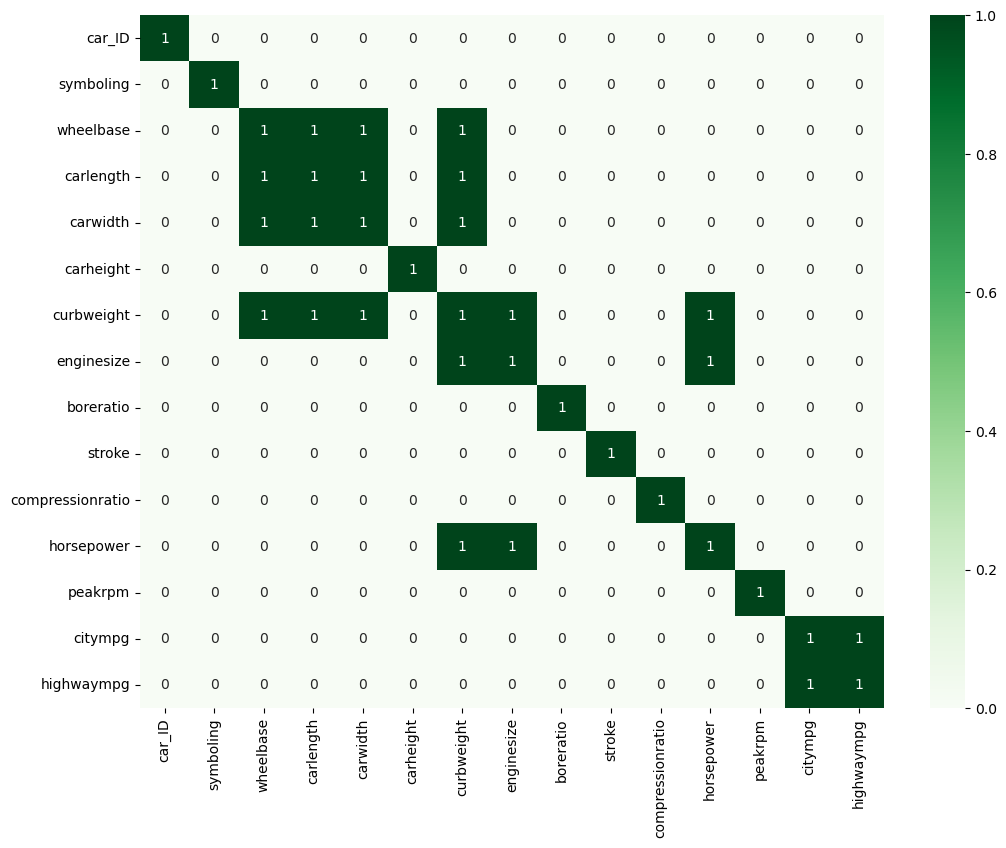

In [ ]:
x=df.drop('price',axis=1)
 
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,9))
sns.heatmap(x.corr(numeric_only=True)>0.75, annot=True,cmap='Greens')
plt.show()

### feature relation ship>0.75

wheelbase - carlength = 
wheelbase - carwidth =
carlength - carwidth =
curbweight - wheelbase = 
curbweight - carlength = 
curbweight - carwidth =
enginesize - curbweight = 
horsepower - curbweight = 
horsepower - enginesize = 
highwaympg - citympg = 

from sklearn.linear_model import RidgeCV



In [17]:
import numpy as np
from sklearn.linear_model import RidgeCV

alphas=np.arange(0.1,10,0.05)

model=RidgeCV(alphas=alphas)



model.fit(X_train, y_train)

print("Best alpha:", model.alpha_)

print("best score: ",model.score(X_test,y_test))
 

Best alpha: 9.950000000000003
best score:  0.8040933847321539


In [18]:
import numpy as np
from sklearn.linear_model import LassoCV

alphas=np.arange(0.1,10,0.05)

model=LassoCV(alphas=alphas)



model.fit(X_train, y_train)

print("Best alpha:", model.alpha_)

print("best score: ",model.score(X_test,y_test))

Best alpha: 9.950000000000003
best score:  0.8040934124003777
